RMSE: 1.43
MAE: 0.86
R² Score: 0.53


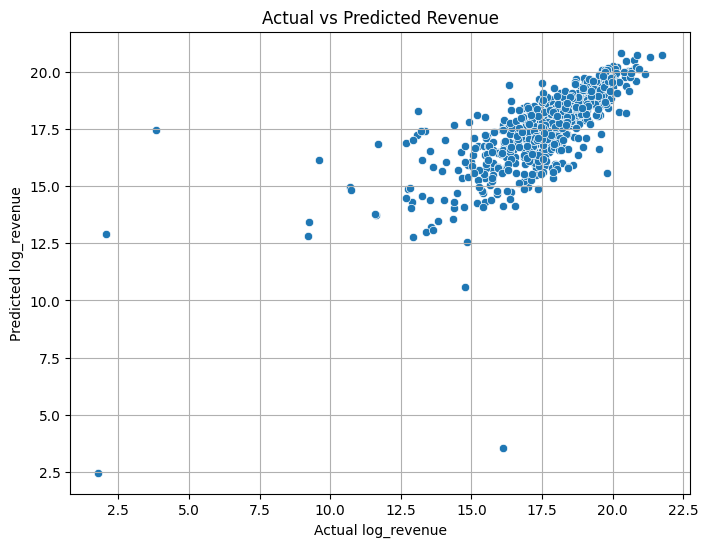

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

df = pd.read_csv('../data/processed/final_movies.csv')
df.head()

X = df.drop(['title','log_revenue'],axis =1)
y = df['log_revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R² Score: {r2:.2f}')

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel("Actual log_revenue")
plt.ylabel("Predicted log_revenue")
plt.title("Actual vs Predicted Revenue")
plt.grid(True)
joblib.dump(model, '../models/revenue_model.pkl')
plt.show()

